### Example 3: k Nearest Neighbours

We will look at how kNN performance varies with change in the parameter k.

In [2]:
# loading numpy for data processing
import numpy as np

# Loading matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Loading K-NN classifier
from sklearn.neighbors import KNeighborsClassifier

# Loading pandas for loading dataset into dataframe
import pandas as pd

# Loading datasets for iris dataset
from sklearn import datasets


# Loading iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [3]:
# Considering only the first two features
X = data[['sepal length (cm)','sepal width (cm)']].values
y = data['target'].values
set(y)

{0.0, 1.0, 2.0}

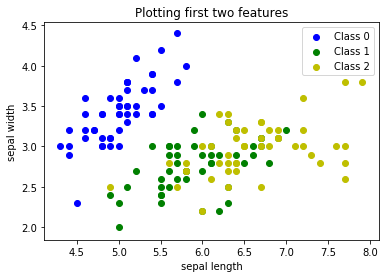

In [4]:
# Plotting the data
plt.title('Plotting first two features')
plt.scatter(X[0:49,0], X[0:49,1], color = 'b', label = 'Class 0')
plt.scatter(X[50:99,0], X[50:99,1], color = 'g', label = 'Class 1')
plt.scatter(X[100:149,0], X[100:149,1], color = 'y', label = 'Class 2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [5]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [6]:
# Setting up arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    print(X_train.shape)
    print(y_train.shape)
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)
(90, 2)
(90,)


In [6]:
#Generating accuracy plots
plt.title('k-NN Accuracy on varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

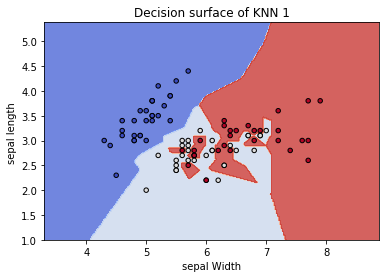

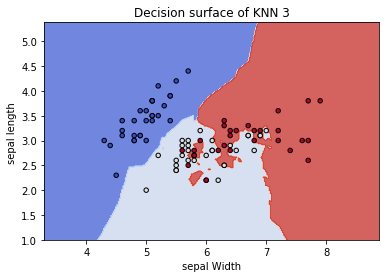

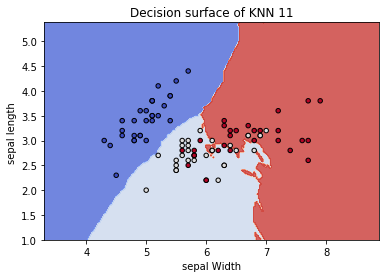

In [7]:
X1 = X_train
y1 = y_train

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, knn, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

for n in [1, 3, 5, 7, 9, 11]:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    clf = knn
    knn.score(X_test,y_test)
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of KNN ' + str(n))
    # Set-up grid for plotting.
    X0, X1 = X_train[:, 0], X_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('sepal length ')
    ax.set_xlabel('sepal Width')

    ax.set_title(title)
plt.show()